In [1]:
import sys

# need to add cocpit dir to path - can't relative import with sister directory
sys.path.insert(0, "..")

import itertools

import matplotlib.pyplot as plt
import seaborn as sns

import cocpit.config as config
import cocpit.data_loaders as data_loaders
import cocpit.plotting_scripts.plot_metrics as plot_metrics
import cocpit.predictions as predictions

sns.set_style("whitegrid")
import torch
%load_ext autoreload
%autoreload 2

In [2]:
plt_params = {
    "axes.labelsize": "xx-large",
    "axes.titlesize": "xx-large",
    "xtick.labelsize": "xx-large",
    "ytick.labelsize": "xx-large",
    "legend.title_fontsize": 12,
}
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(plt_params)

# confusion matrices from folds

In [3]:
"""
iterate through each fold and append predictions and actual labels
changing saved model and validation data each time
"""
kfolds = 2  # CHANGE BACK TO 5
all_preds = []
all_labels = []
for fold in range(kfolds):
    val_data = torch.load(
        f"{config.VAL_LOADER_SAVE_DIR}e{config.MAX_EPOCHS}"
        f"_val_loader20_bs{config.BATCH_SIZE}"
        f"_k{str(fold)}_vgg16.pt"
    )

    model_name = (
        f"{config.MODEL_SAVE_DIR}e{config.MAX_EPOCHS}"
        f"_bs{config.BATCH_SIZE}"
        f"_k{str(fold)}_vgg16.pt"
    )

    model = torch.load(model_name)
    bs_idx = model_name.find("bs")
    batch_size = int(model_name[bs_idx + 3 : bs_idx + 5])

    # get predictions from val loader
    val_loader = data_loaders.create_loader(
        val_data, batch_size=batch_size, sampler=None
    )
    p = predictions.Predict(model, val_loader)
    preds, labels = p.predictions_for_confmatrix()
    all_preds.append(preds)
    all_labels.append(labels)

In [4]:
all_labels = list(itertools.chain(*all_labels))
all_preds = list(itertools.chain(*all_preds))

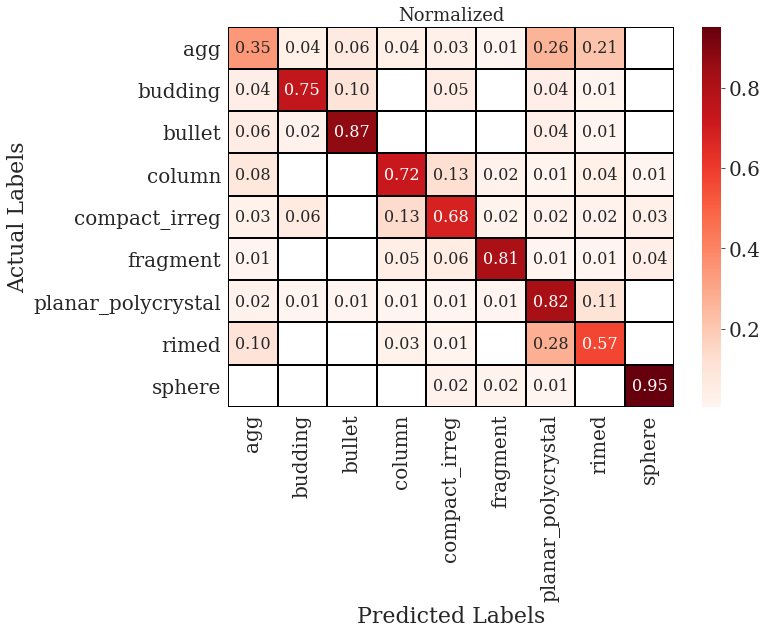

In [5]:
# plot/save conf matrix
save_name = "/data/data/plots/conf_matrix_allfolds.pdf"

plot_metrics.conf_matrix(
    all_labels, all_preds, norm="true", save_name=save_name, save_fig=True
)

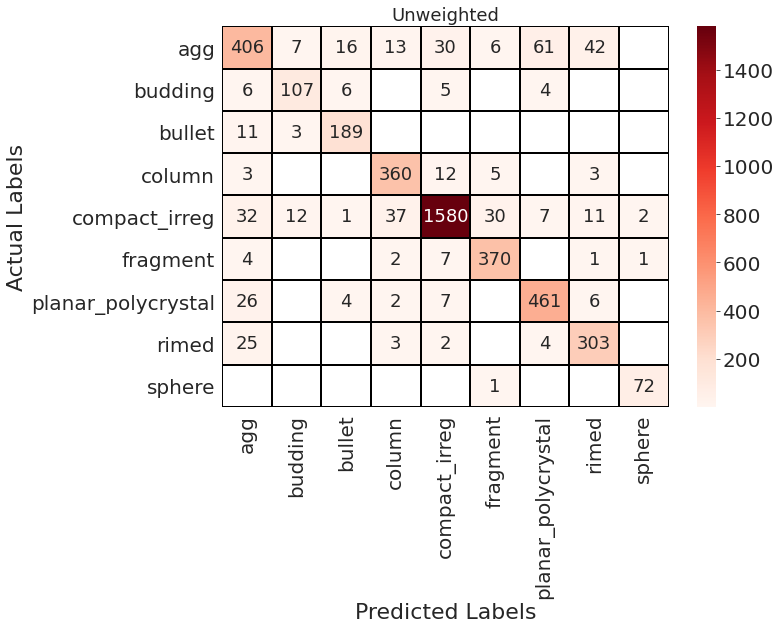

In [12]:
# plot/save conf matrix
save_name = "/data/data/plots/conf_matrix_allfolds.pdf"

plot_metrics.conf_matrix(
    all_labels, all_preds, norm=None, save_name=save_name, save_fig=True
)

### plot confusion matrix on one validation dataloader (no folds)

In [46]:
"""
iterate through each fold and append predictions and actual labels
changing saved model and validation data each time
"""

val_data = torch.load(
    "/data/data/saved_val_loaders/no_mask/v1.4.0/e[15]_val_loader20_bs[64]_k0_vgg16.pt"
)
model = torch.load(
    "/data/data/saved_models/no_mask/v1.4.0/e[15]_bs[28]_k0_vgg16.pt"
).cuda()
bs_idx = config.MODEL_SAVENAME.find("bs")
batch_size = int(config.MODEL_SAVENAME[bs_idx + 2 : bs_idx + 4])


val_loader = data_loaders.create_loader(val_data, batch_size, sampler=None)
p = predictions.Predict(model, val_loader)
all_preds, all_labels = p.predictions_for_confmatrix()

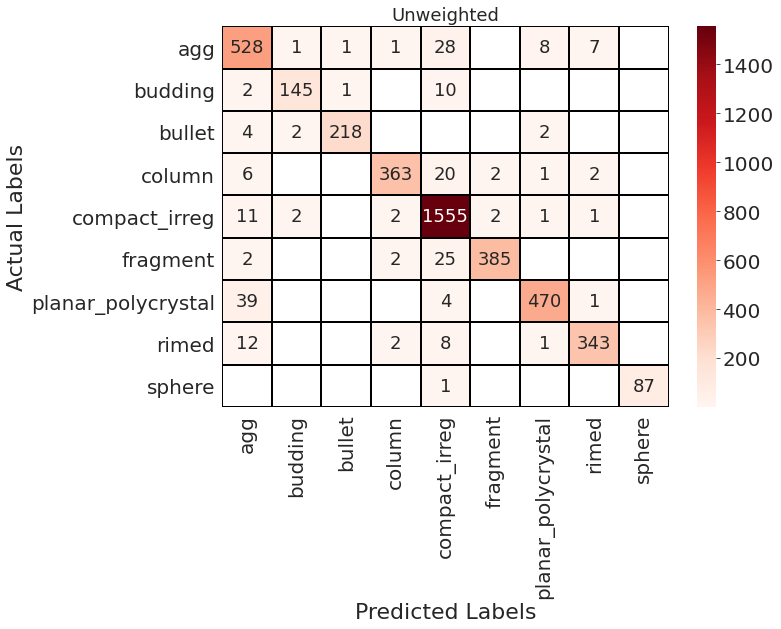

In [47]:
# plot/save conf matrix from one val_loader
# don't normalize (show magnitude of predictions per class)
save_name = "/data/data/plots/conf_matrix_v1.4.0.pdf"

plot_metrics.conf_matrix(all_preds, all_labels, norm=None, save_name=save_name)

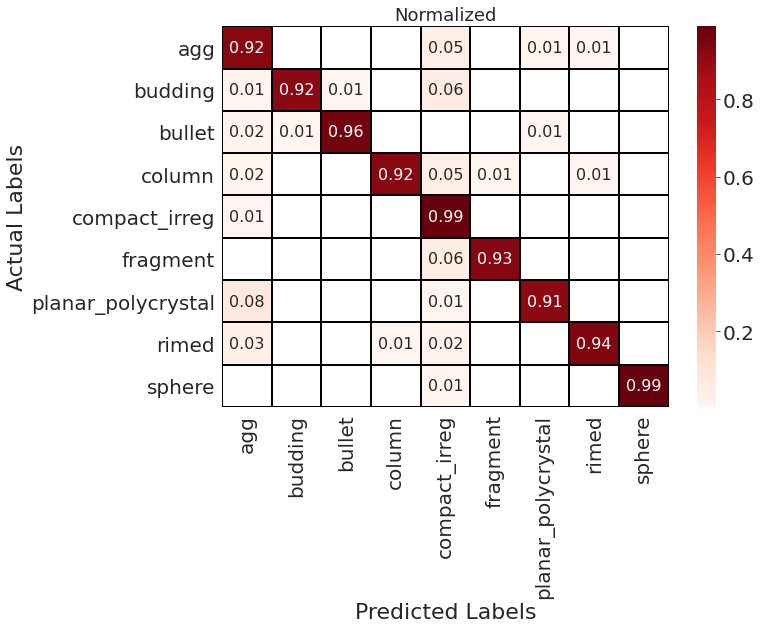

In [48]:
# plot/save conf matrix from one val_loader
# normalize (show relative % of (in)correct predictions)
save_name = "/data/data/plots/norm_conf_matrix_v1.4.0.pdf"

plot_metrics.conf_matrix(all_preds, all_labels, norm="true", save_name=save_name)